# **Wavelet Feature And Hand Movement**

## 0. Start

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

## 1.Load and Process data (EEG and Hand Movement)

In [ ]:
df_time=pd.read_csv("/content/drive/MyDrive/JHU/MLMA/MLMA Project/BS-HMS-Dataset/all_persons_features.csv")

In [ ]:
rows_to_drop = ['Test20', 'Test21', 'Test27']
df_time_filtered = df_time[~df_time['Test'].str.contains('|'.join(rows_to_drop))]
df_time_filtered

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,Test
0,23948.212043,0.114477,0.332606,0.091983,-0.141396,0.004454,23912.058097,-5.090786,-1.491028,-1.816503,...,-0.922225,-0.342368,-0.008797,23947.785568,-0.138773,0.263904,0.161817,-0.021692,0.004548,EEG_Test0_1
1,23934.374036,2.852079,0.256122,0.035535,0.008744,0.000329,23938.140667,1.304878,0.523035,-0.000734,...,0.123359,0.069284,0.000440,23936.427631,2.035387,0.329784,-0.032609,0.192239,-0.001187,EEG_Test0_2
2,23958.823237,-0.403195,-0.085348,0.090591,-0.076419,0.002789,23963.298887,1.335970,0.798692,-0.751814,...,0.998350,0.227824,0.018134,23963.144427,-0.341884,-0.095610,0.030200,-0.066442,0.003880,EEG_Test0_3
3,23969.736876,-0.738860,0.203005,-0.008236,0.168204,0.003106,23969.644167,-4.001203,-0.188962,0.233066,...,0.120797,0.007305,0.001021,23956.820391,-1.987978,-0.512351,0.092099,0.072553,-0.000021,EEG_Test0_4
4,23948.072472,-0.173193,0.157899,0.046353,-0.059603,-0.002456,23951.364927,0.655335,-0.060575,0.085118,...,0.058674,-0.071531,0.000209,23955.644776,-2.499911,-0.072077,0.003461,-0.041627,-0.002911,EEG_Test0_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,23983.084321,1.533391,0.237576,-0.078016,-0.058969,0.001908,23980.416319,0.491757,0.100662,-0.019101,...,-0.031140,0.195526,-0.001856,23979.440825,1.298427,0.133997,-0.069612,-0.178514,0.001823,EEG_Test26_4
212,23927.523788,1.171575,0.279307,0.086692,0.145100,0.002786,23929.524102,1.511335,0.700155,0.129721,...,0.001938,0.110987,0.004296,23926.416068,2.180047,0.453251,0.113384,0.091799,0.003759,EEG_Test26_5
213,23951.509630,-0.487477,0.122966,-0.023049,-0.072993,0.004537,23951.673480,-1.582431,0.758108,-0.096076,...,0.162380,0.074365,0.003413,23950.856864,0.260691,0.227889,-0.016642,0.095920,0.000546,EEG_Test26_6
214,23965.258979,-0.179881,0.069529,-0.105300,-0.108697,-0.000655,23965.454197,-1.797909,-0.710798,-0.041174,...,-0.084029,-0.141468,0.005208,23964.440151,0.364880,0.262933,-0.173946,-0.076394,0.003002,EEG_Test26_7


In [ ]:
df_time_filtered=df_time_filtered.drop(columns=["Test"], )
df_time_filtered = df_time_filtered.reset_index(drop=True)
df_time_filtered

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,23948.212043,0.114477,0.332606,0.091983,-0.141396,0.004454,23912.058097,-5.090786,-1.491028,-1.816503,...,8.622125,-0.922225,-0.342368,-0.008797,23947.785568,-0.138773,0.263904,0.161817,-0.021692,0.004548
1,23934.374036,2.852079,0.256122,0.035535,0.008744,0.000329,23938.140667,1.304878,0.523035,-0.000734,...,0.240418,0.123359,0.069284,0.000440,23936.427631,2.035387,0.329784,-0.032609,0.192239,-0.001187
2,23958.823237,-0.403195,-0.085348,0.090591,-0.076419,0.002789,23963.298887,1.335970,0.798692,-0.751814,...,-0.166684,0.998350,0.227824,0.018134,23963.144427,-0.341884,-0.095610,0.030200,-0.066442,0.003880
3,23969.736876,-0.738860,0.203005,-0.008236,0.168204,0.003106,23969.644167,-4.001203,-0.188962,0.233066,...,-0.665623,0.120797,0.007305,0.001021,23956.820391,-1.987978,-0.512351,0.092099,0.072553,-0.000021
4,23948.072472,-0.173193,0.157899,0.046353,-0.059603,-0.002456,23951.364927,0.655335,-0.060575,0.085118,...,-0.208791,0.058674,-0.071531,0.000209,23955.644776,-2.499911,-0.072077,0.003461,-0.041627,-0.002911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,23983.084321,1.533391,0.237576,-0.078016,-0.058969,0.001908,23980.416319,0.491757,0.100662,-0.019101,...,0.402555,-0.031140,0.195526,-0.001856,23979.440825,1.298427,0.133997,-0.069612,-0.178514,0.001823
196,23927.523788,1.171575,0.279307,0.086692,0.145100,0.002786,23929.524102,1.511335,0.700155,0.129721,...,0.639538,0.001938,0.110987,0.004296,23926.416068,2.180047,0.453251,0.113384,0.091799,0.003759
197,23951.509630,-0.487477,0.122966,-0.023049,-0.072993,0.004537,23951.673480,-1.582431,0.758108,-0.096076,...,0.003418,0.162380,0.074365,0.003413,23950.856864,0.260691,0.227889,-0.016642,0.095920,0.000546
198,23965.258979,-0.179881,0.069529,-0.105300,-0.108697,-0.000655,23965.454197,-1.797909,-0.710798,-0.041174,...,0.230891,-0.084029,-0.141468,0.005208,23964.440151,0.364880,0.262933,-0.173946,-0.076394,0.003002


In [ ]:
metadata=pd.read_excel("/content/drive/MyDrive/JHU/MLMA/MLMA Project/BS-HMS-Dataset/Emotiv-based-Data/Demographic Details of Participants.xlsx")
metadata.columns=[
    "User ID", "Age", "Gender", "Dominant Hand", "Date / Time",
    "Video ID 1", "Video ID 2", "Date / Time", "Video ID 3", "Video ID 4"]
metadata

,User ID,Age,Gender,Dominant Hand,Date / Time,Video ID 1,Video ID 2,Date / Time,Video ID 3,Video ID 4
0,Test0,27,Male,Right,08/18/2019/2:00:00 PM,15,8,08/23/2019/3:40:00 PM,2.0,11.0
1,Test1,24,Male,Right,08/18/2019/3:20:00 PM,5,5,08/22/2019/4:30:00 PM,9.0,5.0
2,test2,30,Female,Right,08/19/2019/4:20:00 PM,8,11,08/20/2019/4:40:00 PM,5.0,2.0
3,test3,25,Male,Right,08/20/2019/1:28:00 PM,14,7,08/28/2019/3:15:00 PM,15.0,1.0
4,test4,24,Male,Left,08/21/2019/3:20:00 PM,12,6,08/30/2019/5:10:00 PM,15.0,19.0
5,test5,27,Male,Right,08/22/2019/3:15:00 PM,5,15,09/13/2019/4:25:00 PM,1.0,19.0
6,test6,25,Male,Right,08/23/2019/1:55:00 PM,9,12,09/04/2019/4:50:00 PM,12.0,9.0
7,test7,27,Female,Right,08/23/2019/2:50:00 PM,1,14,09/04/2019/5:30:00 PM,10.0,8.0
8,test8,24,Female,Right,08/25/2019/12:50:00 PM,7,12,09.25/2019/4:45:00 PM,1.0,10.0
9,test9,20,Male,Right,08/28/2019/2:00:00 PM,9,11,09/04/2019/6:50:00 PM,11.0,16.0


In [ ]:
metadata_video_id=metadata[["User ID","Video ID 1", "Video ID 2", "Video ID 3", "Video ID 4"]]
metadata_video_id=metadata_video_id.dropna()
metadata_video_id

,User ID,Video ID 1,Video ID 2,Video ID 3,Video ID 4
0,Test0,15,8,2.0,11.0
1,Test1,5,5,9.0,5.0
2,test2,8,11,5.0,2.0
3,test3,14,7,15.0,1.0
4,test4,12,6,15.0,19.0
5,test5,5,15,1.0,19.0
6,test6,9,12,12.0,9.0
7,test7,1,14,10.0,8.0
8,test8,7,12,1.0,10.0
9,test9,9,11,11.0,16.0


In [ ]:
df_rhm_acc = pd.read_csv("/content/drive/MyDrive/JHU/MLMA/MLMA Project/BS-HMS-Dataset/Emotiv_Right_acc_extracted.csv")
df_rhm_gyro= pd.read_csv("/content/drive/MyDrive/JHU/MLMA/MLMA Project/BS-HMS-Dataset/Emotiv_Right_gyro_extracted.csv")

def add_suffix_to_feature_names(df, suffix):
    new_column_names = {col: col + suffix for col in df.columns}
    return df.rename(columns=new_column_names)

df_rhm_acc = add_suffix_to_feature_names(df_rhm_acc, '_acc')
df_rhm_gyro = add_suffix_to_feature_names(df_rhm_gyro, '_gyro')
df_rhm_acc=df_rhm_acc.drop(columns=["Filename_Part_acc"])
df_rhm_gyro=df_rhm_gyro.drop(columns=["Filename_Part_gyro"])
df_rhm = pd.concat([df_rhm_acc, df_rhm_gyro], axis = 1)
df_rhm

,X_mean_acc,X_std_acc,X_var_acc,X_median_acc,X_min_acc,X_max_acc,X_activity_acc,X_mobility_acc,X_complexity_acc,X_ar_coeff_0_acc,...,Z_ACF1_gyro,Z_ACF2_gyro,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro
0,-6.846076,1.127397,1.271024,-7.291028,-9.866585,3.020774,1.271024,0.033221,41.360217,1.039849,...,-0.282172,0.049478,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171
1,2.378614,0.445303,0.198294,2.427151,-15.984729,19.594337,0.198294,0.283186,3.950224,1.344210,...,0.006878,-0.021570,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881
2,-4.600323,1.208001,1.459265,-4.332489,-8.411251,2.436726,1.459265,0.029166,48.092388,1.015230,...,0.027719,-0.066030,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921
3,2.307475,0.842399,0.709637,2.494173,-5.548458,6.352721,0.709637,0.108667,10.930011,1.282584,...,0.021337,-0.182476,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682
4,-0.876954,0.603183,0.363829,-1.010116,-5.711226,2.800559,0.363829,0.072352,16.832129,1.235047,...,0.000851,0.008886,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.026608,0.673073,0.453027,-0.895221,-7.166558,4.294190,0.453027,0.190876,6.090877,1.327769,...,-0.101010,0.004093,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154
196,0.855077,0.705780,0.498126,0.684581,-2.963326,16.674097,0.498126,0.117301,10.614548,1.285143,...,-0.012828,-0.038737,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542
197,1.761846,0.449221,0.201799,1.766506,-3.710142,6.534637,0.201799,0.241573,5.045190,1.340544,...,-0.001342,0.045436,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280
198,-0.530926,1.917458,3.676647,-0.694156,-11.762347,10.220843,3.676647,0.049494,22.914340,1.349513,...,-0.031774,-0.098687,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279


In [ ]:
df_time_hm = df_time_filtered
df_time_hm

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,23948.212043,0.114477,0.332606,0.091983,-0.141396,0.004454,23912.058097,-5.090786,-1.491028,-1.816503,...,8.622125,-0.922225,-0.342368,-0.008797,23947.785568,-0.138773,0.263904,0.161817,-0.021692,0.004548
1,23934.374036,2.852079,0.256122,0.035535,0.008744,0.000329,23938.140667,1.304878,0.523035,-0.000734,...,0.240418,0.123359,0.069284,0.000440,23936.427631,2.035387,0.329784,-0.032609,0.192239,-0.001187
2,23958.823237,-0.403195,-0.085348,0.090591,-0.076419,0.002789,23963.298887,1.335970,0.798692,-0.751814,...,-0.166684,0.998350,0.227824,0.018134,23963.144427,-0.341884,-0.095610,0.030200,-0.066442,0.003880
3,23969.736876,-0.738860,0.203005,-0.008236,0.168204,0.003106,23969.644167,-4.001203,-0.188962,0.233066,...,-0.665623,0.120797,0.007305,0.001021,23956.820391,-1.987978,-0.512351,0.092099,0.072553,-0.000021
4,23948.072472,-0.173193,0.157899,0.046353,-0.059603,-0.002456,23951.364927,0.655335,-0.060575,0.085118,...,-0.208791,0.058674,-0.071531,0.000209,23955.644776,-2.499911,-0.072077,0.003461,-0.041627,-0.002911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,23983.084321,1.533391,0.237576,-0.078016,-0.058969,0.001908,23980.416319,0.491757,0.100662,-0.019101,...,0.402555,-0.031140,0.195526,-0.001856,23979.440825,1.298427,0.133997,-0.069612,-0.178514,0.001823
196,23927.523788,1.171575,0.279307,0.086692,0.145100,0.002786,23929.524102,1.511335,0.700155,0.129721,...,0.639538,0.001938,0.110987,0.004296,23926.416068,2.180047,0.453251,0.113384,0.091799,0.003759
197,23951.509630,-0.487477,0.122966,-0.023049,-0.072993,0.004537,23951.673480,-1.582431,0.758108,-0.096076,...,0.003418,0.162380,0.074365,0.003413,23950.856864,0.260691,0.227889,-0.016642,0.095920,0.000546
198,23965.258979,-0.179881,0.069529,-0.105300,-0.108697,-0.000655,23965.454197,-1.797909,-0.710798,-0.041174,...,0.230891,-0.084029,-0.141468,0.005208,23964.440151,0.364880,0.262933,-0.173946,-0.076394,0.003002


In [ ]:
metadata_video_id_list = metadata_video_id.drop('User ID', axis=1).values.flatten().tolist()
metadata_video_id_list = [int(item) for item in metadata_video_id_list for _ in range(2)] #to int and double the time
metadata_video_id_list = [1 if item in [1,2,5,6,13,14,15,16,17,18] else 0 for item in metadata_video_id_list] #map
df_time_hm["Emotion"]=metadata_video_id_list
df_time_hm

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,Emotion
0,23948.212043,0.114477,0.332606,0.091983,-0.141396,0.004454,23912.058097,-5.090786,-1.491028,-1.816503,...,-0.922225,-0.342368,-0.008797,23947.785568,-0.138773,0.263904,0.161817,-0.021692,0.004548,1
1,23934.374036,2.852079,0.256122,0.035535,0.008744,0.000329,23938.140667,1.304878,0.523035,-0.000734,...,0.123359,0.069284,0.000440,23936.427631,2.035387,0.329784,-0.032609,0.192239,-0.001187,1
2,23958.823237,-0.403195,-0.085348,0.090591,-0.076419,0.002789,23963.298887,1.335970,0.798692,-0.751814,...,0.998350,0.227824,0.018134,23963.144427,-0.341884,-0.095610,0.030200,-0.066442,0.003880,0
3,23969.736876,-0.738860,0.203005,-0.008236,0.168204,0.003106,23969.644167,-4.001203,-0.188962,0.233066,...,0.120797,0.007305,0.001021,23956.820391,-1.987978,-0.512351,0.092099,0.072553,-0.000021,0
4,23948.072472,-0.173193,0.157899,0.046353,-0.059603,-0.002456,23951.364927,0.655335,-0.060575,0.085118,...,0.058674,-0.071531,0.000209,23955.644776,-2.499911,-0.072077,0.003461,-0.041627,-0.002911,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,23983.084321,1.533391,0.237576,-0.078016,-0.058969,0.001908,23980.416319,0.491757,0.100662,-0.019101,...,-0.031140,0.195526,-0.001856,23979.440825,1.298427,0.133997,-0.069612,-0.178514,0.001823,1
196,23927.523788,1.171575,0.279307,0.086692,0.145100,0.002786,23929.524102,1.511335,0.700155,0.129721,...,0.001938,0.110987,0.004296,23926.416068,2.180047,0.453251,0.113384,0.091799,0.003759,0
197,23951.509630,-0.487477,0.122966,-0.023049,-0.072993,0.004537,23951.673480,-1.582431,0.758108,-0.096076,...,0.162380,0.074365,0.003413,23950.856864,0.260691,0.227889,-0.016642,0.095920,0.000546,0
198,23965.258979,-0.179881,0.069529,-0.105300,-0.108697,-0.000655,23965.454197,-1.797909,-0.710798,-0.041174,...,-0.084029,-0.141468,0.005208,23964.440151,0.364880,0.262933,-0.173946,-0.076394,0.003002,1


## 2. Train Test Split

In [ ]:
folder = [num for num in range(1, 26) for _ in range(8)]
df_time_hm["Folder"]=folder
df_time_hm

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,Emotion,Folder
0,23948.212043,0.114477,0.332606,0.091983,-0.141396,0.004454,23912.058097,-5.090786,-1.491028,-1.816503,...,-0.342368,-0.008797,23947.785568,-0.138773,0.263904,0.161817,-0.021692,0.004548,1,1
1,23934.374036,2.852079,0.256122,0.035535,0.008744,0.000329,23938.140667,1.304878,0.523035,-0.000734,...,0.069284,0.000440,23936.427631,2.035387,0.329784,-0.032609,0.192239,-0.001187,1,1
2,23958.823237,-0.403195,-0.085348,0.090591,-0.076419,0.002789,23963.298887,1.335970,0.798692,-0.751814,...,0.227824,0.018134,23963.144427,-0.341884,-0.095610,0.030200,-0.066442,0.003880,0,1
3,23969.736876,-0.738860,0.203005,-0.008236,0.168204,0.003106,23969.644167,-4.001203,-0.188962,0.233066,...,0.007305,0.001021,23956.820391,-1.987978,-0.512351,0.092099,0.072553,-0.000021,0,1
4,23948.072472,-0.173193,0.157899,0.046353,-0.059603,-0.002456,23951.364927,0.655335,-0.060575,0.085118,...,-0.071531,0.000209,23955.644776,-2.499911,-0.072077,0.003461,-0.041627,-0.002911,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,23983.084321,1.533391,0.237576,-0.078016,-0.058969,0.001908,23980.416319,0.491757,0.100662,-0.019101,...,0.195526,-0.001856,23979.440825,1.298427,0.133997,-0.069612,-0.178514,0.001823,1,25
196,23927.523788,1.171575,0.279307,0.086692,0.145100,0.002786,23929.524102,1.511335,0.700155,0.129721,...,0.110987,0.004296,23926.416068,2.180047,0.453251,0.113384,0.091799,0.003759,0,25
197,23951.509630,-0.487477,0.122966,-0.023049,-0.072993,0.004537,23951.673480,-1.582431,0.758108,-0.096076,...,0.074365,0.003413,23950.856864,0.260691,0.227889,-0.016642,0.095920,0.000546,0,25
198,23965.258979,-0.179881,0.069529,-0.105300,-0.108697,-0.000655,23965.454197,-1.797909,-0.710798,-0.041174,...,-0.141468,0.005208,23964.440151,0.364880,0.262933,-0.173946,-0.076394,0.003002,1,25


In [ ]:
import random
folder_names = [i for i in range(1, 26)]

random.shuffle(folder_names)
train_split = int(0.8 * len(folder_names))
train_folders = folder_names[:train_split]
test_folders = folder_names[train_split:]

print(train_folders)
print(test_folders)

[20, 24, 4, 21, 5, 9, 7, 18, 6, 14, 15, 8, 12, 22, 17, 1, 11, 25, 13, 19]
[10, 2, 16, 23, 3]


In [ ]:
train_time = df_time_hm[df_time_hm['Folder'].isin(train_folders)]
X_train_time =train_time.iloc[:,:-2]
y_train_time=train_time.iloc[:,-2]

test_time = df_time_hm[df_time_hm['Folder'].isin(test_folders)]
X_test_time =test_time.iloc[:,:-2]
y_test_time=test_time.iloc[:,-2]

In [ ]:
train_time

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,Emotion,Folder
0,23948.212043,0.114477,0.332606,0.091983,-0.141396,0.004454,23912.058097,-5.090786,-1.491028,-1.816503,...,-0.342368,-0.008797,23947.785568,-0.138773,0.263904,0.161817,-0.021692,0.004548,1,1
1,23934.374036,2.852079,0.256122,0.035535,0.008744,0.000329,23938.140667,1.304878,0.523035,-0.000734,...,0.069284,0.000440,23936.427631,2.035387,0.329784,-0.032609,0.192239,-0.001187,1,1
2,23958.823237,-0.403195,-0.085348,0.090591,-0.076419,0.002789,23963.298887,1.335970,0.798692,-0.751814,...,0.227824,0.018134,23963.144427,-0.341884,-0.095610,0.030200,-0.066442,0.003880,0,1
3,23969.736876,-0.738860,0.203005,-0.008236,0.168204,0.003106,23969.644167,-4.001203,-0.188962,0.233066,...,0.007305,0.001021,23956.820391,-1.987978,-0.512351,0.092099,0.072553,-0.000021,0,1
4,23948.072472,-0.173193,0.157899,0.046353,-0.059603,-0.002456,23951.364927,0.655335,-0.060575,0.085118,...,-0.071531,0.000209,23955.644776,-2.499911,-0.072077,0.003461,-0.041627,-0.002911,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,23983.084321,1.533391,0.237576,-0.078016,-0.058969,0.001908,23980.416319,0.491757,0.100662,-0.019101,...,0.195526,-0.001856,23979.440825,1.298427,0.133997,-0.069612,-0.178514,0.001823,1,25
196,23927.523788,1.171575,0.279307,0.086692,0.145100,0.002786,23929.524102,1.511335,0.700155,0.129721,...,0.110987,0.004296,23926.416068,2.180047,0.453251,0.113384,0.091799,0.003759,0,25
197,23951.509630,-0.487477,0.122966,-0.023049,-0.072993,0.004537,23951.673480,-1.582431,0.758108,-0.096076,...,0.074365,0.003413,23950.856864,0.260691,0.227889,-0.016642,0.095920,0.000546,0,25
198,23965.258979,-0.179881,0.069529,-0.105300,-0.108697,-0.000655,23965.454197,-1.797909,-0.710798,-0.041174,...,-0.141468,0.005208,23964.440151,0.364880,0.262933,-0.173946,-0.076394,0.003002,1,25


In [ ]:
test_time

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,Emotion,Folder
8,23969.860549,-2.020490,-0.402348,0.074909,-0.037602,-0.003071,23959.804023,-6.249222,-0.956883,0.330511,...,-0.119225,0.003458,23967.826683,-1.767191,-0.821341,0.159283,-0.074416,-0.001676,1,2
9,23974.719110,0.175863,-0.572763,0.217464,-0.006632,-0.003723,23977.206183,1.673459,-1.078330,-0.138387,...,0.414408,0.001124,23973.824200,0.161610,-1.042354,0.156175,0.023640,-0.001879,1,2
10,23951.417094,0.309488,-0.011365,-0.252574,-0.003595,0.010150,23951.086855,1.817615,-0.634415,-0.061839,...,-0.179788,0.011625,23953.484134,-0.531660,-0.006094,-0.105344,-0.171396,0.009838,1,2
11,23973.305245,0.873819,0.262197,0.330714,0.057735,-0.003214,23969.763085,-4.312427,-2.086869,1.727688,...,0.106855,-0.003986,23973.926101,1.397502,0.481295,0.232389,0.092422,-0.001601,1,2
12,23940.591182,0.690410,-0.244968,0.018717,0.016448,-0.003279,23941.325077,-0.128057,-0.244584,-0.031493,...,0.077776,-0.000664,23939.492882,0.909237,-0.083730,0.200038,-0.076419,-0.003068,0,2
13,23964.800526,0.486080,0.189881,-0.014360,-0.037599,0.001634,23964.987464,0.317042,0.239522,0.121280,...,-0.020296,0.003070,23965.174772,0.774687,0.152496,0.074782,-0.043114,0.003247,0,2
14,23975.318345,0.367994,0.178108,-0.088810,-0.004214,-0.004352,23973.307994,0.563841,-0.060316,0.061498,...,0.110109,0.001486,23974.035051,0.133245,0.239892,-0.103469,0.157908,0.001231,1,2
15,23979.771454,0.914182,0.237686,-0.071631,0.003698,-0.001887,23974.807514,0.500746,-0.090949,-0.096900,...,0.062959,0.001063,23976.985965,1.311367,0.837086,-0.121319,0.142175,0.002860,1,2
16,23969.920823,-0.714380,0.023983,-0.110536,0.047931,0.000263,23968.618467,-0.844877,0.439961,-0.191598,...,-0.043206,0.001371,23971.194366,-1.781141,0.195959,-0.147065,0.048651,-0.000657,0,3
17,23974.785112,-0.049649,-0.071629,0.089427,0.033930,-0.000029,23995.277306,0.557508,-1.524234,0.440330,...,-0.000646,-0.000443,23975.585805,-0.364879,0.114240,0.071934,0.019265,0.002035,0,3


## 3. KNN + Cross Validation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def create_grid_search_knn_model():
    knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())
    param_grid = {
        'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11],
        'kneighborsclassifier__weights': ['uniform', 'distance']
    }
    grid_search = GridSearchCV(knn_pipeline, param_grid, cv=3, scoring='accuracy', verbose=1)

    return grid_search

In [ ]:
fold = 10
cv_scores = []
best_model_time = None
best_accuracy_time = 0

for i in range(fold):
    random.shuffle(train_folders)
    train_split_cv = int(0.9 * len(train_folders))
    train_folders_cv = train_folders[:train_split_cv]
    val_folders_cv = train_folders[train_split_cv:]
    train_cv = train_time[train_time['Folder'].isin(train_folders_cv)]
    X_train_cv = train_cv.iloc[:, :-2]
    y_train_cv = train_cv.iloc[:, -2]
    val_cv = train_time[train_time['Folder'].isin(val_folders_cv)]
    X_val_cv = val_cv.iloc[:, :-2]
    y_val_cv = val_cv.iloc[:, -2]
    grid_search_model = create_grid_search_knn_model()
    grid_search_model.fit(X_train_cv, y_train_cv)

    print(f"Best parameters for fold {i+1}: {grid_search_model.best_params_}")
    best_model = grid_search_model.best_estimator_

    val_predictions = best_model.predict(X_val_cv)
    val_accuracy = accuracy_score(y_val_cv, val_predictions)
    cv_scores.append(val_accuracy)
    print(f"Fold {i+1} completed. Validation accuracy: {val_accuracy * 100:.2f}%")

    if val_accuracy > best_accuracy_time:
        best_accuracy_time = val_accuracy
        best_model_time = best_model

print(f"Best validation accuracy: {best_accuracy_time * 100:.2f}%")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for fold 1: {'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__weights': 'uniform'}
Fold 1 completed. Validation accuracy: 25.00%
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for fold 2: {'kneighborsclassifier__n_neighbors': 11, 'kneighborsclassifier__weights': 'uniform'}
Fold 2 completed. Validation accuracy: 43.75%
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for fold 3: {'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__weights': 'uniform'}
Fold 3 completed. Validation accuracy: 62.50%
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for fold 4: {'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__weights': 'uniform'}
Fold 4 completed. Validation accuracy: 43.75%
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for fold 5: {'kneighborsclassifier__n_neig

In [ ]:
print(train_folders_cv)
print(val_folders_cv)

[21, 13, 4, 1, 7, 22, 9, 12, 19, 17, 18, 11, 20, 5, 14, 8, 25, 15]
[24, 6]


In [ ]:
print(f"Best validation accuracy: {best_accuracy_time * 100:.2f}%")

Best validation accuracy: 62.50%



# **Evaluation**

# Wavelet and Hand Test Accuracy

Test Accuracy: 75.00%


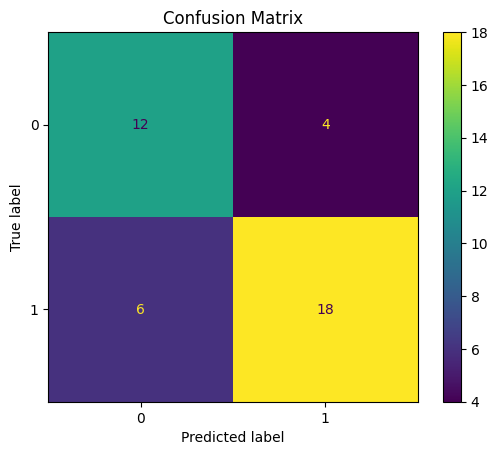

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71        16
           1       0.82      0.75      0.78        24

    accuracy                           0.75        40
   macro avg       0.74      0.75      0.74        40
weighted avg       0.76      0.75      0.75        40



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_time = (best_model_time.predict(X_test_time) > 0.5).astype("int32")

# Calculate test accuracy
test_accuracy_time = accuracy_score(y_test_time, y_pred_time)
print(f"Test Accuracy: {test_accuracy_time * 100:.2f}%")

# Generate the confusion matrix
conf_matrix_time = confusion_matrix(y_test_time, y_pred_time)

# Plot the confusion matrix
ConfusionMatrixDisplay(conf_matrix_time).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report_time = classification_report(y_test_time, y_pred_time)
print("Classification Report:")
print(report_time)

# ROC curves

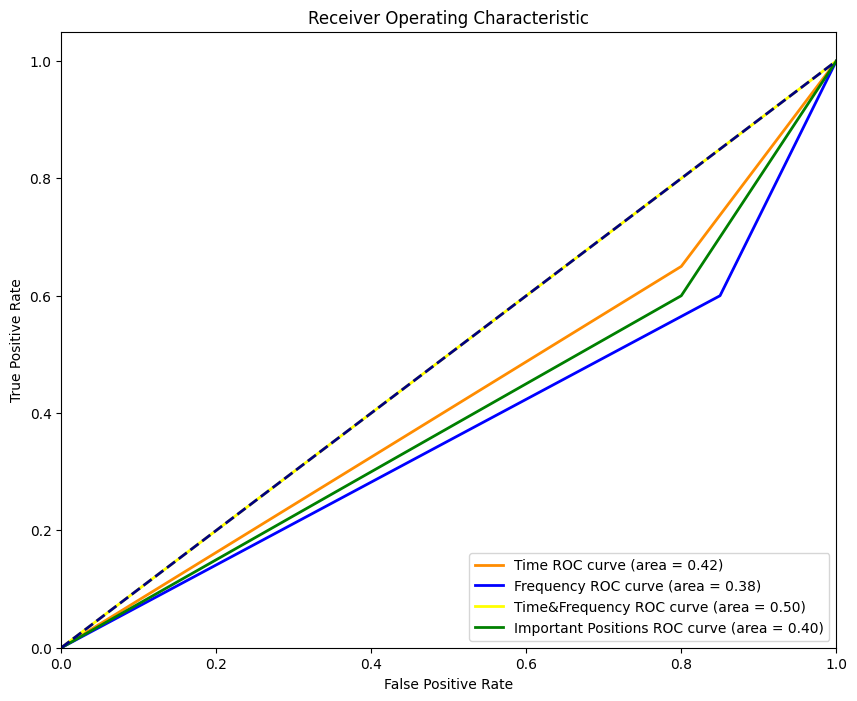

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assume models and test datasets are defined for each type
# Predict probabilities for the positive class for all models
y_pred_probs_time = best_model_time.predict(X_test_time).ravel()
y_pred_probs_frequency = best_model_frequency.predict(X_test_frequency).ravel()
y_pred_probs_time_frequency = best_model_time_frequency.predict(X_test_time_frequency).ravel()
y_pred_probs_important_positions = best_model_important_positions.predict(X_test_important_positions).ravel()  # New model

# Compute the ROC curve for each model
fpr_time, tpr_time, thresholds_time = roc_curve(y_test_time, y_pred_probs_time)
roc_auc_time = auc(fpr_time, tpr_time)

fpr_frequency, tpr_frequency, thresholds_frequency = roc_curve(y_test_frequency, y_pred_probs_frequency)
roc_auc_frequency = auc(fpr_frequency, tpr_frequency)

fpr_time_frequency, tpr_time_frequency, thresholds_time_frequency = roc_curve(y_test_time_frequency, y_pred_probs_time_frequency)
roc_auc_time_frequency = auc(fpr_time_frequency, tpr_time_frequency)

fpr_important_positions, tpr_important_positions, thresholds_important_positions = roc_curve(y_test_important_positions, y_pred_probs_important_positions)  # New ROC computation
roc_auc_important_positions = auc(fpr_important_positions, tpr_important_positions)  # New AUC computation

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_time, tpr_time, color='darkorange', lw=2, label='Time ROC curve (area = %0.2f)' % roc_auc_time)
plt.plot(fpr_frequency, tpr_frequency, color='blue', lw=2, label='Frequency ROC curve (area = %0.2f)' % roc_auc_frequency)
plt.plot(fpr_time_frequency, tpr_time_frequency, color='yellow', lw=2, label='Time&Frequency ROC curve (area = %0.2f)' % roc_auc_time_frequency)
plt.plot(fpr_important_positions, tpr_important_positions, color='green', lw=2, label='Important Positions ROC curve (area = %0.2f)' % roc_auc_important_positions)  # New curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()